In [1]:
import pandas as pd

# Load dataset directly from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ["variance", "skewness", "kurtosis", "entropy", "class"]
df = pd.read_csv(url, header=None, names=columns)

# Preview the data
df.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Class distribution
print(df['class'].value_counts())

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64
          variance     skewness     kurtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
class
0    762
1    610
Name: count, dtype: int64


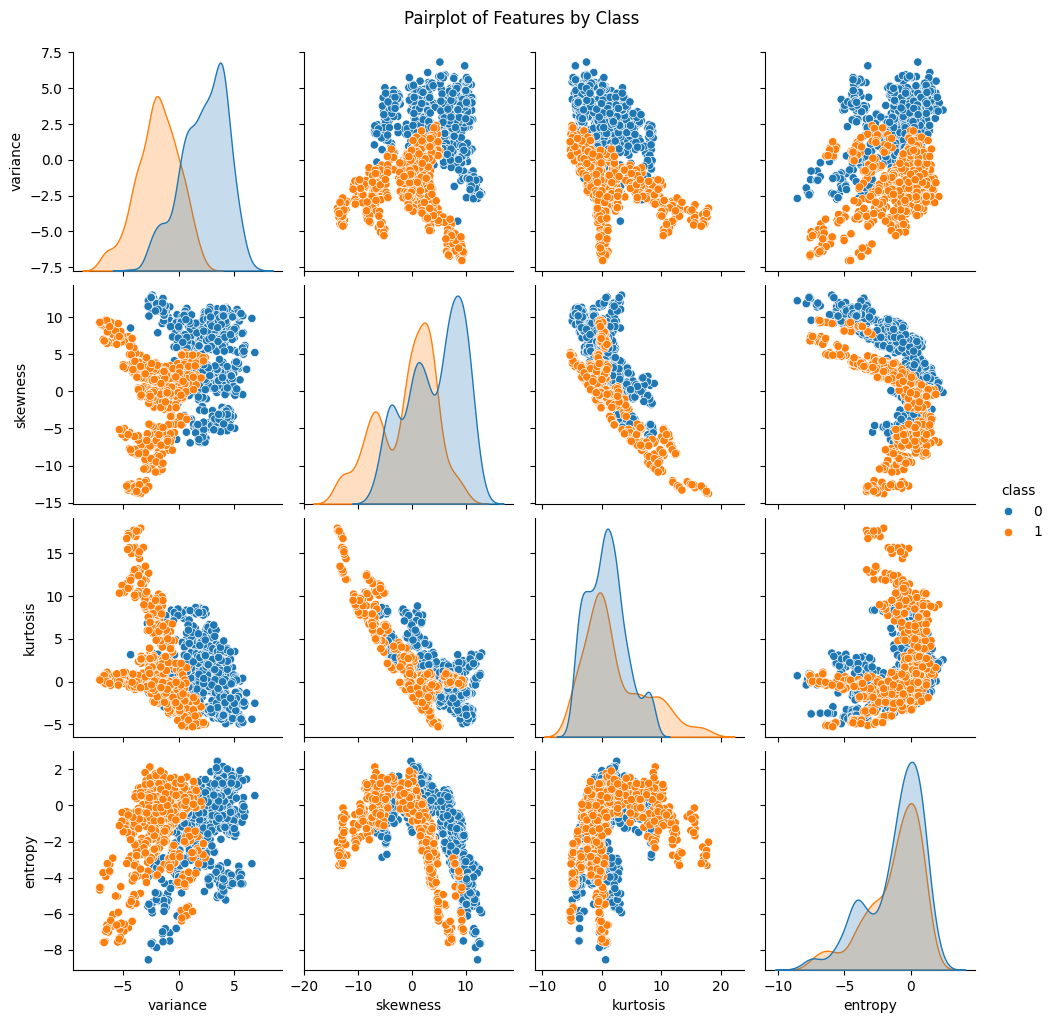

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='class')
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()

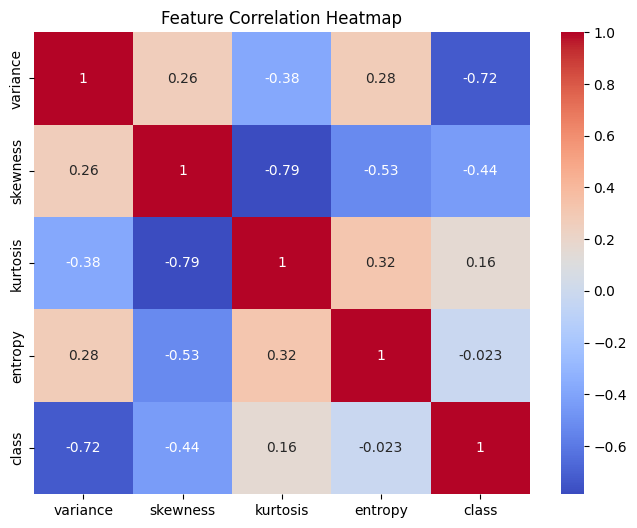

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('class', axis=1))

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
predicted_clusters = kmeans.labels_

# Map cluster labels to match real class
# KMeans labels may be 0/1 but not necessarily aligned with class
mapped_labels = 1 - predicted_clusters  # flip labels if necessary
acc = max(accuracy_score(df['class'], predicted_clusters),
          accuracy_score(df['class'], mapped_labels))

print(f"K-Means clustering accuracy (approx): {acc * 100:.2f}%")

K-Means clustering accuracy (approx): 55.83%


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
score = model.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {score * 100:.2f}%")

Logistic Regression Accuracy: 98.79%
